## Transfer Learning Inception V3 using Keras

In [1]:

from google.colab import drive
drive.mount('/content/drive/')                                   

Mounted at /content/drive/


In [2]:
!pip install -q keras


In [3]:
import keras

Please download the dataset from the below url

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below


from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG'
valid_path = '/content/drive/MyDrive/Datasets/TARGETS/TEST/15_DEG'


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58892288/58889256 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG/*')
folders

['/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG/BTR70',
 '/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG/T72',
 '/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG/BMP2']

In [10]:
len(folders)

3

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1622 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/TARGETS/TEST/15_DEG',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1365 images belonging to 3 classes.


In [ ]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


In [ ]:
!pip install --upgrade Pillow

Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages (8.0.1)


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

Epoch 1/50
51/51 [==============================] - 852s 17s/step - loss: 0.9541 - accuracy: 0.6073 - val_loss: 0.7390 - val_accuracy: 0.6842
Epoch 2/50
51/51 [==============================] - 25s 484ms/step - loss: 0.7584 - accuracy: 0.6634 - val_loss: 0.7221 - val_accuracy: 0.6967
Epoch 3/50
51/51 [==============================] - 24s 478ms/step - loss: 0.6647 - accuracy: 0.7263 - val_loss: 0.6779 - val_accuracy: 0.7194
Epoch 4/50
51/51 [==============================] - 24s 479ms/step - loss: 0.6562 - accuracy: 0.7263 - val_loss: 0.8303 - val_accuracy: 0.7011
Epoch 5/50
51/51 [==============================] - 24s 479ms/step - loss: 0.6134 - accuracy: 0.7546 - val_loss: 0.6437 - val_accuracy: 0.7377
Epoch 6/50
51/51 [==============================] - 24s 479ms/step - loss: 0.6066 - accuracy: 0.7497 - val_loss: 0.6144 - val_accuracy: 0.7348
Epoch 7/50
51/51 [==============================] - 25s 482ms/step - loss: 0.5855 - accuracy: 0.7645 - val_loss: 0.6314 - val_accuracy: 0.7282


In [20]:
import matplotlib.pyplot as plt

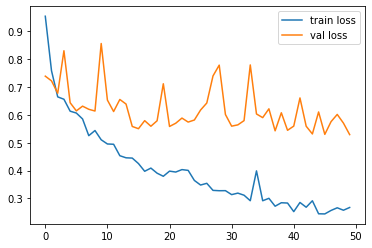

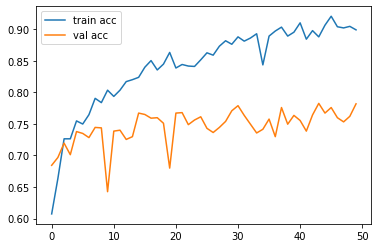

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')



In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.6156750e-02, 3.0497994e-04, 6.0654622e-01, ..., 3.6334237e-01,
        6.5700626e-03, 3.0459701e-03],
       [9.6584576e-01, 6.6870661e-04, 3.6077339e-03, ..., 2.0302070e-02,
        4.6821233e-07, 6.3093556e-03],
       [7.2834606e-05, 1.3558550e-06, 1.1101007e-02, ..., 6.7575014e-01,
        9.4152747e-05, 4.3969296e-05],
       ...,
       [3.4496721e-03, 1.7849829e-04, 9.6736379e-02, ..., 8.8237375e-02,
        2.2338678e-05, 5.4914961e-03],
       [1.1361478e-01, 2.9841738e-04, 4.0347236e-03, ..., 2.9662859e-03,
        2.0344302e-03, 1.2690463e-05],
       [4.3949842e-01, 4.6805780e-02, 1.0078303e-01, ..., 2.6442584e-02,
        8.9371698e-03, 1.2574753e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 0, 4, ..., 3, 3, 0])

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception2.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception2.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/dataset-satellitedata/test/SN_9563/HB03334.000.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__